# Entrega Equipo 02 - Jose Manuel Vega, Ivan Tello, Victor Montesdeoca

Consideramos como positivo que los cilindros sean metalicos. Los cilindros de metal se van a utilizar para una atraccion de feria, mientras que los de roca se utilizaran para elementos decorativos. 
 
Por lo tanto, debemos priorizar que no haya falsos positivos ya que esto pondria en peligro a la gente que se monte en la atraccion. Buscamos maximizar la **precision**

# Imports

In [1]:
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt

from sklearn import tree as t
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#Para conectar plotly y pandas para nuestras graficas
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Imports para los modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
cols = ["V" + str(i) for i in range(1,61)]
cols += ["Class"]
df = pd.read_csv("datasets/sonar.all-data.csv", names = cols)

# EDA

In [3]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

Vemos que todas las variables son numericas

In [5]:
df.duplicated().sum()

0

Vemos que no hay filas duplicadas

In [6]:
X = df.drop(["Class"], axis=1)
Y = df["Class"]

Dividimos en X e Y los datos.

Revisamos la distribucion de los datos viendo su sesgo. Buscaremos aquellas columnas cuyo sesgo sea mayor que 1 o menor que -1, lo cual nos indicara que tienen una asimetria positiva o negativa.

In [7]:
skewCols = df.skew()
skewedCols = skewCols[skewCols.ge(1) | skewCols.le(-1)]
skewedCols

V1     2.131088
V2     2.155644
V3     2.652518
V4     3.401697
V5     2.018141
V6     1.248166
V8     1.481107
V9     1.633870
V10    1.281258
V14    1.022369
V38    1.033366
V44    1.235086
V45    1.366839
V46    1.706674
V47    1.790155
V48    1.277722
V49    1.273385
V50    1.761714
V51    2.716060
V52    2.093976
V53    1.060572
V54    1.093090
V55    1.789946
V56    1.780805
V57    1.653090
V58    2.098330
V59    1.737506
V60    2.775754
dtype: float64

In [8]:
skewedColsList = skewedCols.index.tolist()
skewedColsList

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V8',
 'V9',
 'V10',
 'V14',
 'V38',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60']

In [9]:
len(skewedColsList)

28

Tenemos 28 variables que cumplen con la condicion impuesta sobre el sesgo (menor que -1 o mayor que 1). Las representamos en 2 imagenes con plotly para ver su distribucion.

In [10]:
X[skewedColsList[0:14]].iplot(kind='histogram',subplots=True,bins=50)

In [11]:
X[skewedColsList[14:29]].iplot(kind='histogram',subplots=True,bins=50)

Como podemos ver en estas 2 graficas, tenemos multiples variables cuya distribucion esta sesgada positivamente (hacia la izquierda). Por ello sera necesario tener en cuenta que los datos no estan normalizados a la hora de escoger el modelo.

# Split Train and Test data

Dividimos en conjuntos de entrenamiento y prueba el conjunto de datos.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Basic Decision tree

In [13]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
tree

DecisionTreeClassifier(random_state=1)

In [14]:
y_train_pred = tree.predict(X_train)
y_train_pred

array(['R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M',
       'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M',
       'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M',
       'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'R',
       'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M',
       'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M'], dtype=object)

In [15]:
y_test_pred = tree.predict(X_test)
y_test_pred

array(['M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'R',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'R',
       'M', 'R', 'R'], dtype=object)

In [16]:
#y_test.sort_index()
y_test

161    M
15     R
73     R
96     R
166    M
9      R
100    M
135    M
18     R
148    M
171    M
30     R
155    M
180    M
125    M
197    M
164    M
190    M
84     R
75     R
124    M
170    M
104    M
101    M
69     R
25     R
95     R
16     R
141    M
185    M
154    M
68     R
66     R
120    M
147    M
98     M
138    M
167    M
45     R
113    M
65     R
178    M
Name: Class, dtype: object

In [17]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00        85
           R       1.00      1.00      1.00        81

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           M       0.80      0.62      0.70        26
           R       0.55      0.75      0.63        16

    accuracy                           0.67        42
   macro avg       0.67      0.68      0.66        42
weighted avg       0.70      0.67      0.67        42



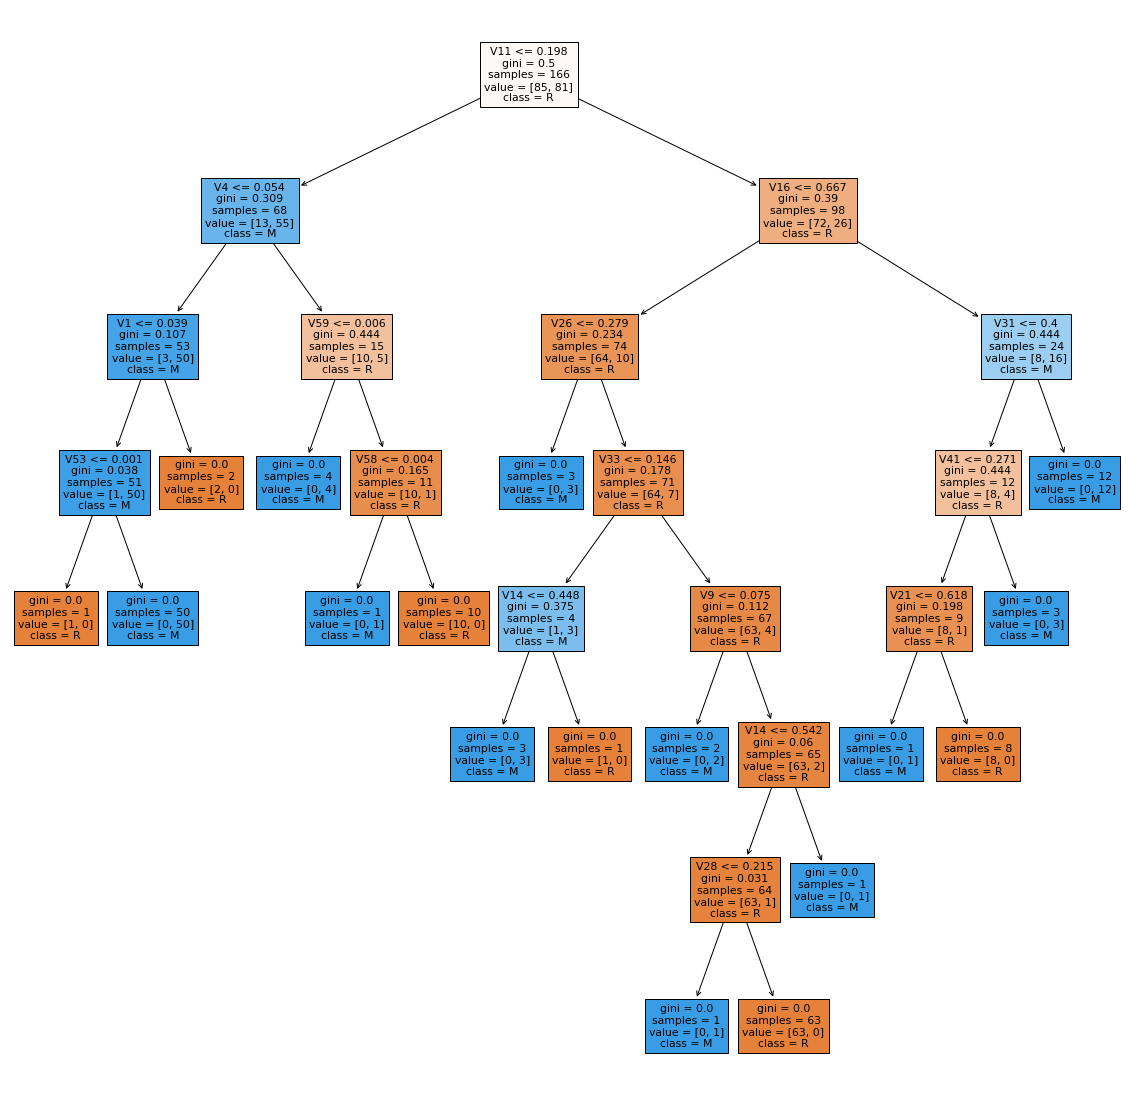

In [19]:
plt.figure(figsize=(20,20))
t.plot_tree(tree,feature_names=df.columns,class_names=df.Class.unique(),filled=True)
plt.show()

Obtenemos una precision de 0.8 con el Arbol de Decision basico en el conjunto de test, mientras que en el de entrenamiento tenemos un 1. Esto nos indica que estamos haciendo overfitting, asi que pasamos ahora a hacer pre-pruning con GridSearch para encontrar el numero optimo de hojas para el arbol y evitar que nuestros datos se ajusten demasiado al conjunto de entrenamiento.

# Pre-prunning

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3]}

In [22]:
tree = DecisionTreeClassifier(random_state=0)
gcv = GridSearchCV(estimator=tree,param_grid=params)
gcv.fit(X_train, y_train)
gcv

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [23]:
model = gcv.best_estimator_
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           M       0.99      0.99      0.99        85
           R       0.99      0.99      0.99        81

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166



In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           M       0.75      0.58      0.65        26
           R       0.50      0.69      0.58        16

    accuracy                           0.62        42
   macro avg       0.62      0.63      0.62        42
weighted avg       0.65      0.62      0.62        42



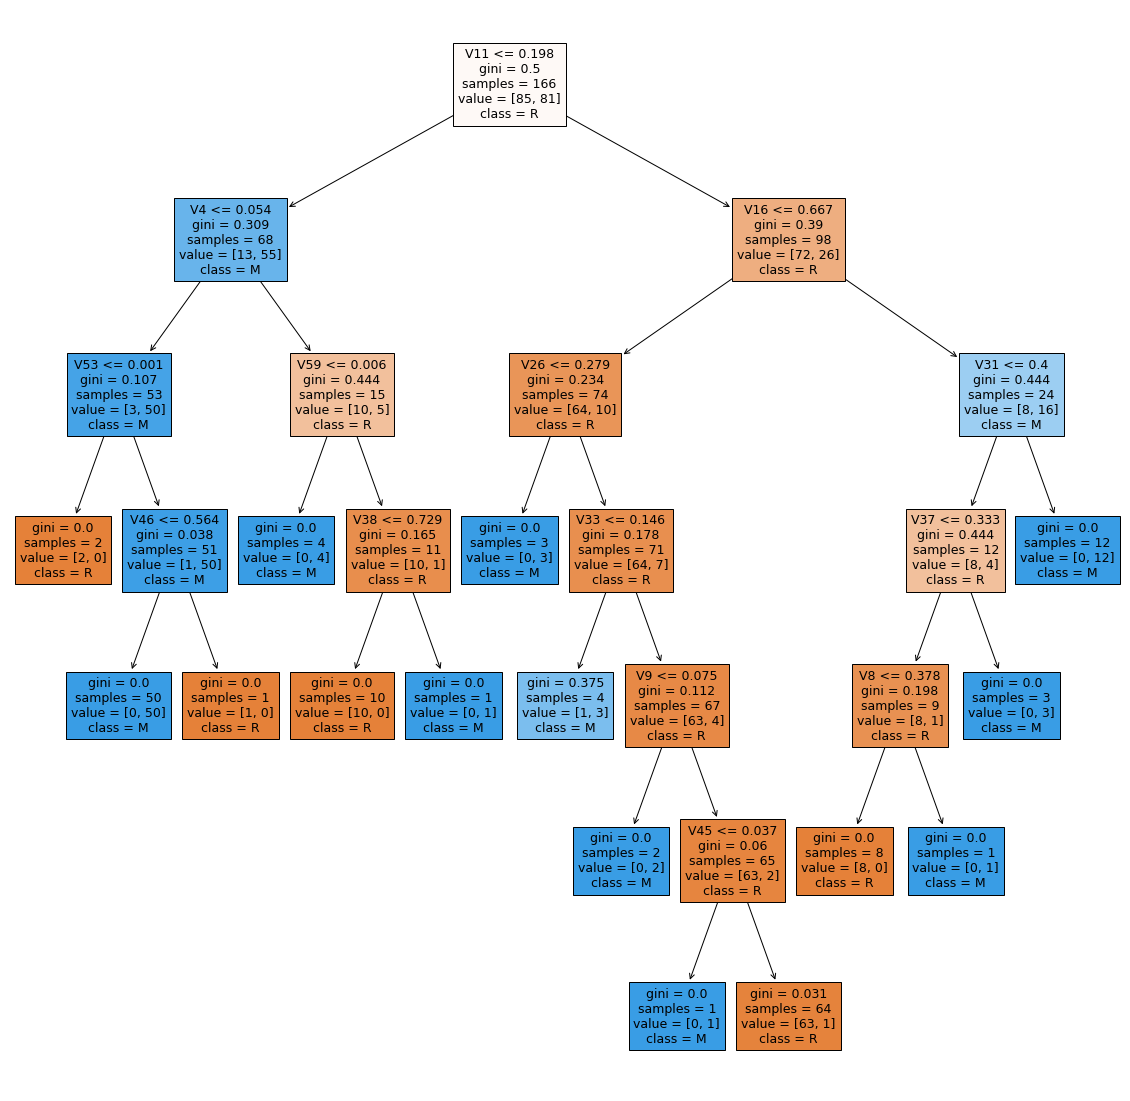

In [26]:
plt.figure(figsize=(20,20))
t.plot_tree(model,feature_names=df.columns,class_names=df.Class.unique(),filled=True)
plt.show()

Podemos observar que ahora nuestro arbol es mas pequeño y el rendimiento ha disminuido para el conjunto de entrenamiento. Ya no estamos sobreajustandonos tanto al conjunto de entrenamiento, aunque no ha mejorado el rendimiento para el conjunto de prueba.

# Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

conf = pd.DataFrame(
    confusion_matrix(y_test,y_pred_rf),
    columns = ['Predicted 0','Predicted 1'],
    index = ['True 0', 'True 1']
)

conf

,Predicted 0,Predicted 1
True 0,20,6
True 1,2,14


In [28]:
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           M       0.91      0.77      0.83        26
           R       0.70      0.88      0.78        16

    accuracy                           0.81        42
   macro avg       0.80      0.82      0.81        42
weighted avg       0.83      0.81      0.81        42



# SVM

In [29]:
svm = SVC(C=10.0)
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)

conf = pd.DataFrame(
    confusion_matrix(y_test,y_pred_svm),
    columns = ['Predicted 0','Predicted 1'],
    index = ['True 0', 'True 1']
)

conf

,Predicted 0,Predicted 1
True 0,23,3
True 1,1,15


In [30]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           M       0.96      0.88      0.92        26
           R       0.83      0.94      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



Tenemos que la precision para SVM es de 0.96, la mayor hasta el momento

# Naives-Bayes

In [31]:
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred_nb_gaussian = nb.predict(X_test)

conf = pd.DataFrame(
    confusion_matrix(y_test,y_pred_nb_gaussian),
    columns = ['Predicted 0','Predicted 1'],
    index = ['True 0', 'True 1']
)

conf

,Predicted 0,Predicted 1
True 0,16,10
True 1,1,15


In [32]:
print(classification_report(y_test,y_pred_nb_gaussian))

              precision    recall  f1-score   support

           M       0.94      0.62      0.74        26
           R       0.60      0.94      0.73        16

    accuracy                           0.74        42
   macro avg       0.77      0.78      0.74        42
weighted avg       0.81      0.74      0.74        42



# Naive-Bayes Multinomial

In [33]:
from sklearn.naive_bayes import MultinomialNB

nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train,y_train)

y_pred_nb_multinomial = nb_multinomial.predict(X_test)


conf = pd.DataFrame(
    confusion_matrix(y_test,y_pred_nb_multinomial),
    columns = ['Predicted 0','Predicted 1'],
    index = ['True 0', 'True 1']
)

conf

,Predicted 0,Predicted 1
True 0,22,4
True 1,3,13


In [34]:
print(classification_report(y_test,y_pred_nb_multinomial))

              precision    recall  f1-score   support

           M       0.88      0.85      0.86        26
           R       0.76      0.81      0.79        16

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42



En definitiva, vemos que SVM es el modelo que mejor precision nos obtiene.

# Clustering

In [35]:
# Para el manejo de los datos
import numpy as np
import pandas as pd

# Para la visualización de los datos
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# Obtención de los datasets que utilizaremos a lo largo del notebook
import statsmodels.api as sm
from sklearn import datasets

# Preprocesado de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Cálculo de distancias
from sklearn.metrics import pairwise_distances

# Modelos de clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

# Evaluación del clustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [36]:
# Escalamos las variables
scaledData = scale(X=X, axis=0, with_mean=True, with_std=True)
scaledData = pd.DataFrame(scaledData, columns=X.columns, index=X.index)

In [37]:
# Guardamos en una lista los valores de inercia variando K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaledData)
    inertia.append(kmeans.inertia_)

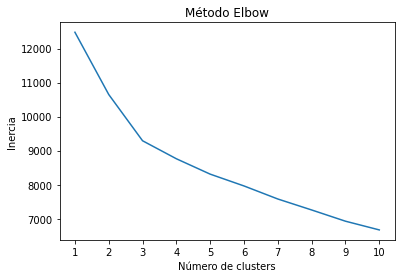

In [38]:
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

In [39]:
# Generamos el modelo con 3 clusters (mejor resultado para metodo del codo)
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaledData)

# Obtenemos a qué cluster pertence cada instancia
labels = kmeans.labels_

In [40]:
print(labels)

[0 2 2 1 2 2 2 2 0 0 0 0 2 0 0 2 1 2 0 2 2 1 1 0 0 0 2 0 2 2 0 0 2 2 2 0 0
 0 0 0 0 0 0 0 1 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1
 2 2 2 2 0 2 2 2 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 2 0 2 2 0 2 0 0 0 2 1 1 1 2
 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
# Obtenemos los centroides como los puntos representativos de cada cluster
print(kmeans.cluster_centers_)

[[-0.45055366 -0.46731528 -0.43910525 -0.45334185 -0.46714482 -0.45762423
  -0.4503347  -0.48406477 -0.39975683 -0.39212736 -0.37423523 -0.31903601
  -0.42963801 -0.60783213 -0.68484434 -0.68971031 -0.61801641 -0.52856729
  -0.49275276 -0.46600757 -0.39480399 -0.22091528  0.02343302  0.20464684
   0.40409188  0.51467892  0.54883171  0.56417222  0.54049418  0.35825487
   0.21330118  0.13828545  0.15761964  0.06120533 -0.02769551 -0.09823121
  -0.16903324 -0.27169564 -0.31568549 -0.36793522 -0.39305934 -0.33134275
  -0.20018154 -0.24841648 -0.38273494 -0.28944438 -0.29145663 -0.34130629
  -0.42555952 -0.3789504  -0.36147948 -0.33409185 -0.33444991 -0.40905422
  -0.4040216  -0.34638136 -0.33592186 -0.39655976 -0.38213903 -0.29103783]
 [ 0.72053119  0.71671513  0.54100026  0.42237882  0.24147567  0.16853736
   0.22986596  0.45534671  0.49324648  0.3750373   0.07735656  0.00249098
  -0.06387449 -0.2215578  -0.2607184  -0.31986643 -0.56440564 -0.78776775
  -0.73719305 -0.55642693 -0.62167534

In [42]:
# Obtenemos el número de iteraciones que han sido necesarias para converger
print(kmeans.n_iter_)

9


In [43]:
# Obtenemos el valor mínimo de la inercia
print(kmeans.inertia_)

9289.676149124984


In [44]:
# Realizamos un Análisis de Componentes Principales para visualizar los conjuntos
pca=PCA(n_components=2)
pcaData=pca.fit_transform(scaledData)

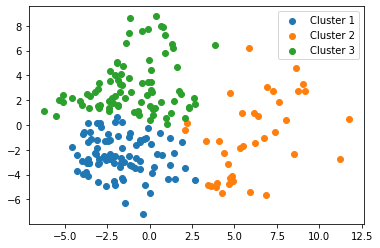

In [45]:
# Visualizamos las instancias en las dos dimensiones correspondientes con las componentes obtenidas
# Coloreamos por cluster
plt.scatter(pcaData[labels==0, 0], pcaData[labels==0, 1], label='Cluster 1')
plt.scatter(pcaData[labels==1, 0], pcaData[labels==1, 1], label='Cluster 2')
plt.scatter(pcaData[labels==2, 0], pcaData[labels==2, 1], label='Cluster 3')
plt.legend()
plt.show()

In [46]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), 
                 inertia, 
                 curve="convex", 
                 direction="decreasing")
kl.elbow

3

In [47]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaledData)
    score = silhouette_score(scaledData, kmeans.labels_)
    silhouette_coefficients.append(score)

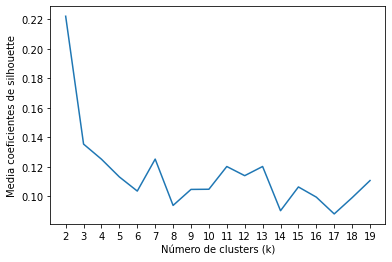

In [48]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Número de clusters (k)")
plt.ylabel("Media coeficientes de silhouette")
plt.show()

In [49]:
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    """Función que nos permite hacer un análisis de silhouette completo."""
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("Para k =", n_clusters,
              "La media de silhouette es :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("El gráfico de silhouette para los distintos clusters.")
        ax1.set_xlabel("Los valores del coeficiente de silhouette")
        ax1.set_ylabel("Número de cluster")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("Visualización de los datos en clusters.")
        ax2.set_xlabel("Componente 1 de la PCA")
        ax2.set_ylabel("Componente 2 de la PCA")

        plt.suptitle(("\nAnálisis de silhouette para clustering con KMeans "
                      "con k = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

Para k = 2 La media de silhouette es : 0.2178194633782484
Para k = 3 La media de silhouette es : 0.13471787253074766
Para k = 4 La media de silhouette es : 0.13649098052831896
Para k = 5 La media de silhouette es : 0.12229111527357212
Para k = 6 La media de silhouette es : 0.13686609352797682
Para k = 7 La media de silhouette es : 0.10803864268778789
Para k = 8 La media de silhouette es : 0.11879259314239257
Para k = 9 La media de silhouette es : 0.1165921836401728
Para k = 10 La media de silhouette es : 0.11484793099580967


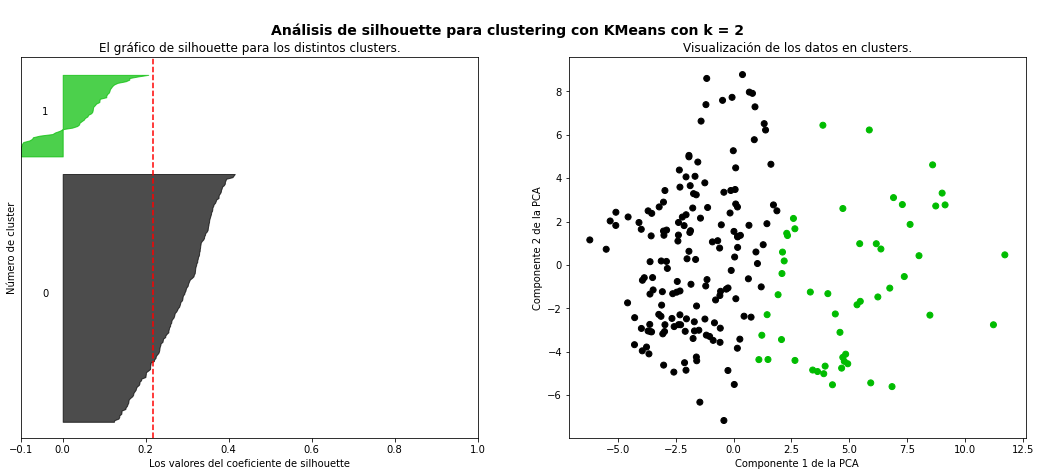

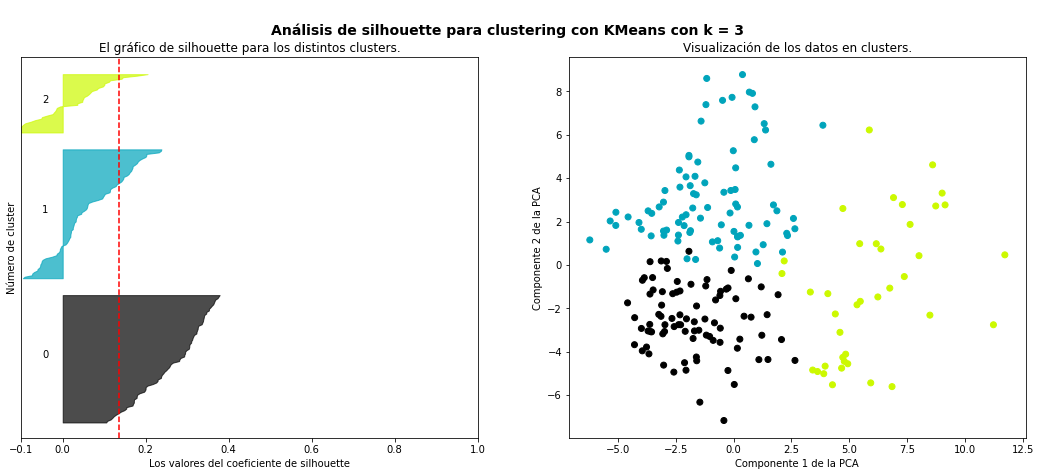

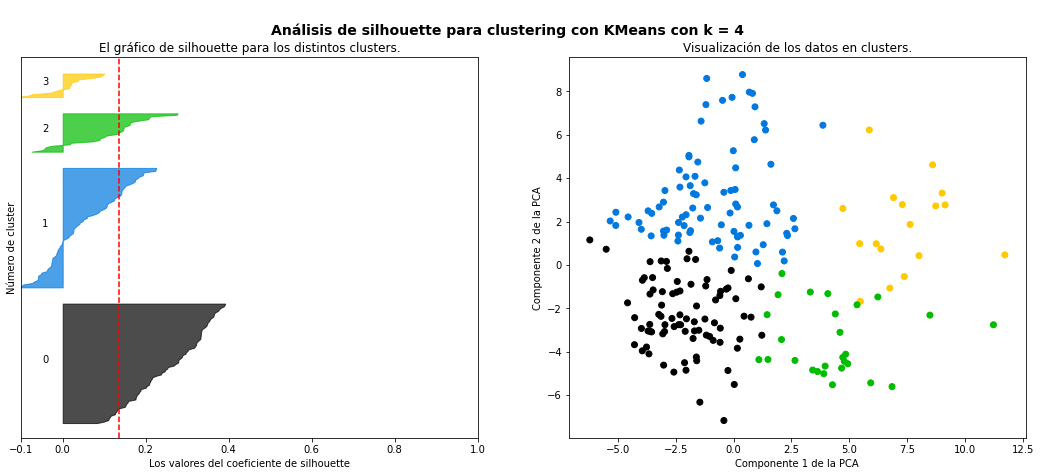

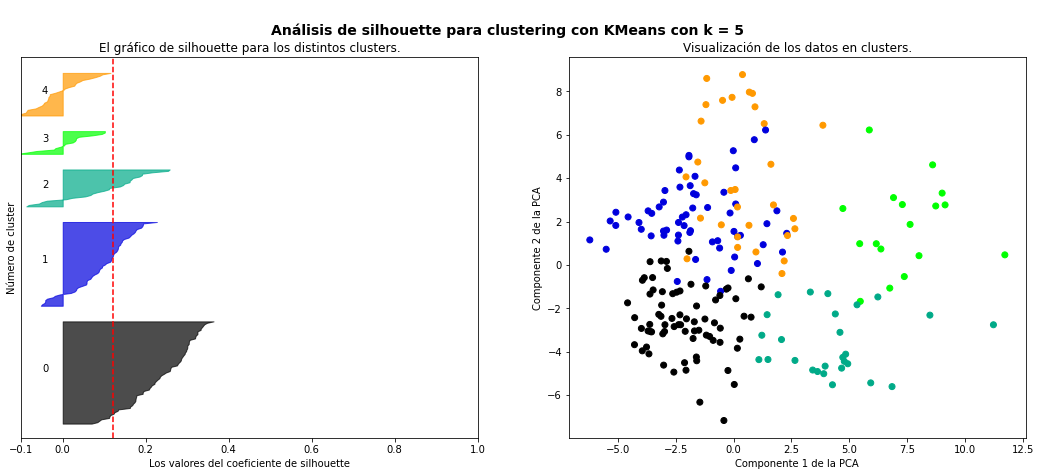

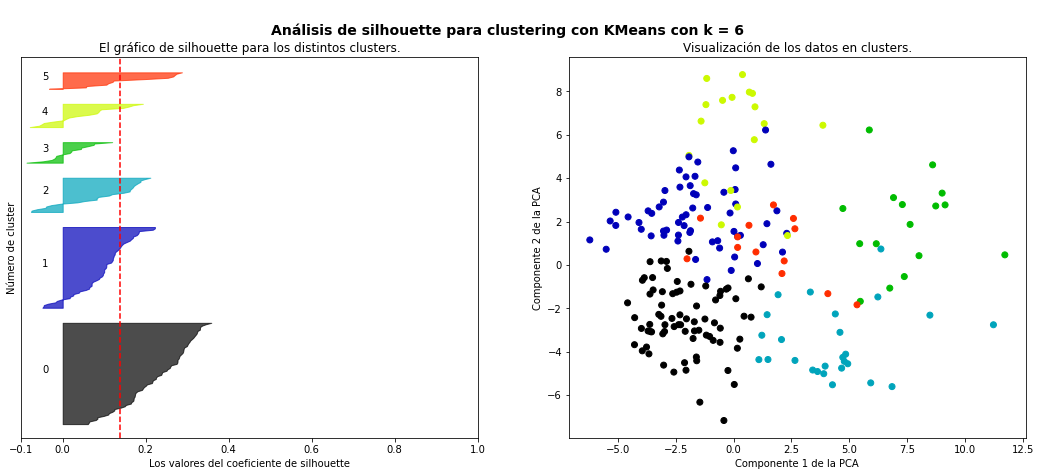

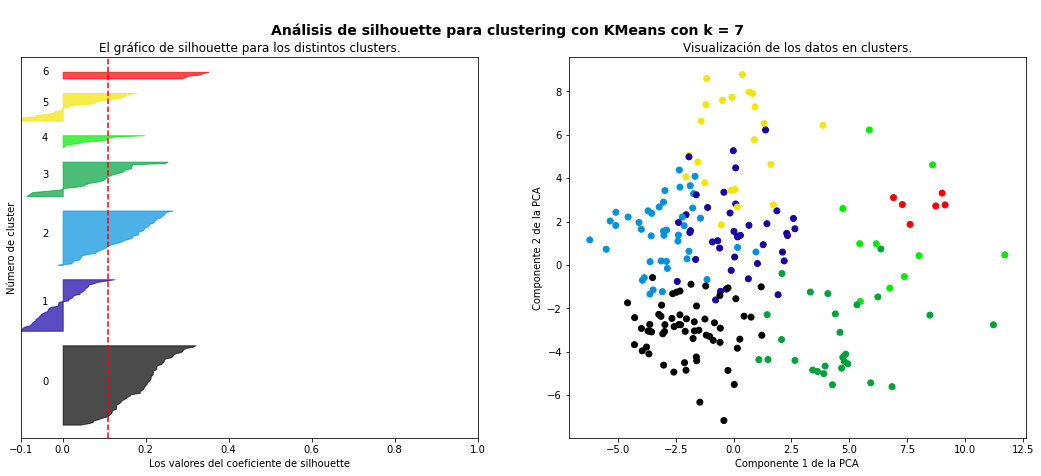

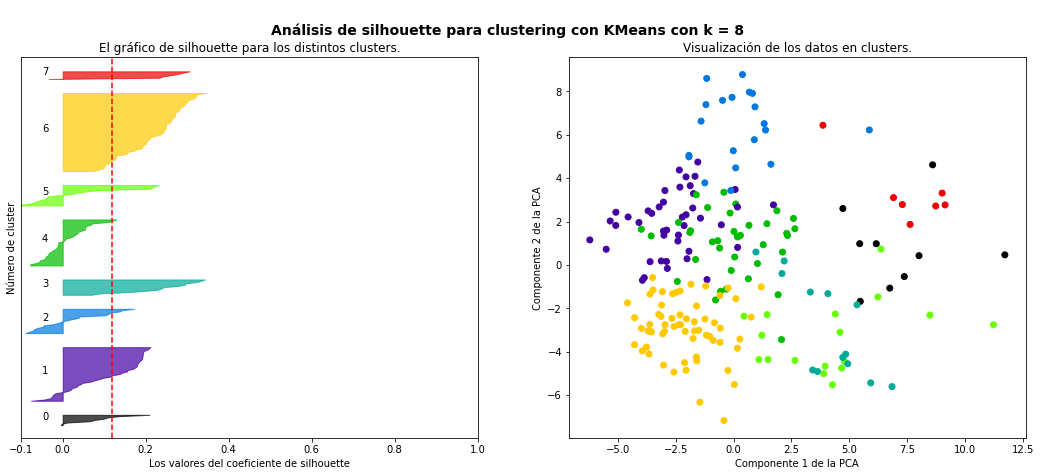

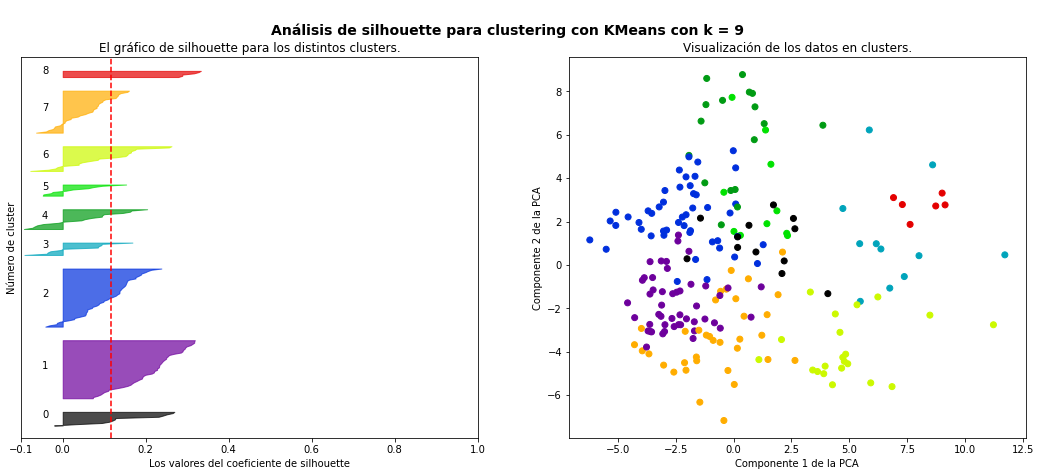

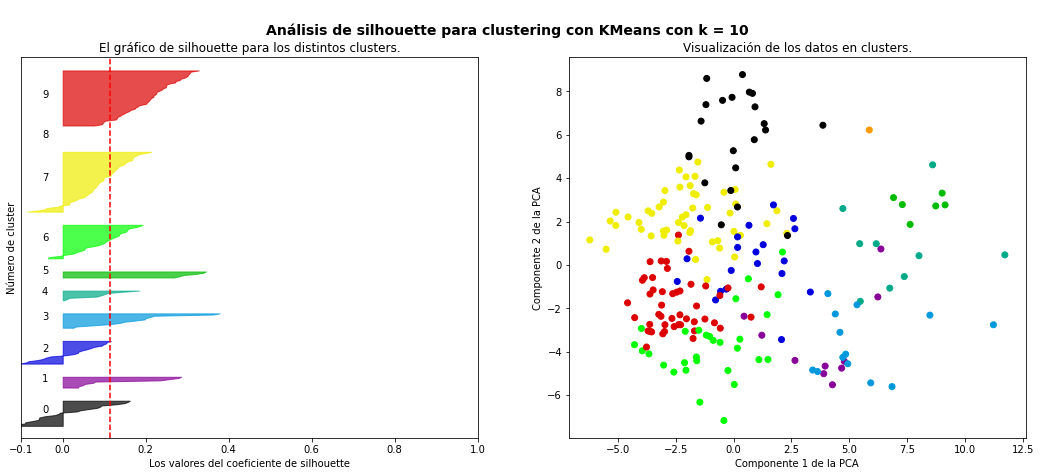

In [50]:
silhouette_analysis(np.array(scaledData), 
                    pd.DataFrame(pcaData), 
                    [2, 3, 4, 5, 6, 7, 8, 9, 10])